In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
from tqdm import tqdm
 
import matplotlib.pyplot as plt 
import plotly.express as px
plt.style.use('ggplot')

# Import ETFs Data from Data Floder

In [2]:
df_overview_fund = pd.read_excel(r'./Data/df_fund_overview.xlsx')
df_fund_flow = pd.read_excel(r'./Data/df_fund_flow.xlsx')
df_fund_performance = pd.read_excel(r'./Data/df_fund_performance.xlsx')
df_fund_volatility = pd.read_excel(r'./Data/df_fund_volatility.xlsx')
df_esg_performance = pd.read_excel(r'./Data/df_esg_performance.xlsx')

1.) ETF Overall Market outlook - AUM Trend

2.) ETF Market Analysis - Fund Flow Analysis / Risk-Volatility Performance 

3.) ESG Factor in Fund Analysis Performance - Regression Analysis

    ESG Fund Flow Overview. Massive inflow in ESG Fund 
    ESG Fund performance better? 5-Year Periods
    ESG Fund have lower volatility? No
    Whethear ESG fund have better Sharpe-ratio? If yes, than we should invest and create more these type of fund for client.

# Fund Overall DataFrame

In [3]:
df_overview_fund

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,SPY,SPDR S&P 500 ETF Trust,Equity,344032,-22.17,81025648,$365.41,A
1,IVV,iShares Core S&P 500 ETF,Equity,278652,-22.17,4866911,$366.95,A
2,VOO,Vanguard S&P 500 ETF,Equity,251468,-22.16,4427467,$335.83,A
3,VTI,Vanguard Total Stock Market ETF,Equity,248023,-23.23,3867662,$183.27,A
4,QQQ,Invesco QQQ Trust,Equity,147375,-32.02,57847406,$269.11,B+
...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,Equity,0,0.00,0,0,0
2976,OSEA,Harbor International Compounders ETF,Equity,0,0.00,0,$18.55,0
2977,BWEB,Bitwise Web3 ETF,Equity,0,0.00,0,$24.90,0
2978,TSME,Thrivent Small-Mid Cap ESG ETF,Equity,0,0.00,0,$24.89,0


In [4]:
df_overview_fund.groupby('Asset Class New')['Asset Class New'].count().reset_index(name='Number of ETFs')

,Asset Class New,Number of ETFs
0,Alternatives,34
1,Bond,506
2,Commodity,109
3,Currency,20
4,Equity,2086
5,Multi-Asset,146
6,Preferred Stock,16
7,Real Estate,45
8,Volatility,18


In [5]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
text_list = df_overview_fund['ETF Name'].to_list()
text = ""
for txt in text_list:
        text = text + " " + txt 

cloud = WordCloud(background_color="white", max_words=200, mask=None, 
        stopwords=stopwords, min_font_size=6, width=800, height=400,colormap="inferno")
 
cloud.generate(text)
cloud.to_file("./Image/output.png")

In [6]:
# Overall Total AUM ($MM)
Top_10_AUM_Fund = df_overview_fund.sort_values(by='Total Assets ($MM)',ascending=False).reset_index(drop=True).head(10)
Top_10_AUM_Equity = df_overview_fund[df_overview_fund['Asset Class New']=='Equity'].sort_values(by='Total Assets ($MM)',ascending=False).reset_index(drop=True).head(10)
Top_10_AUM_Bond = df_overview_fund[df_overview_fund['Asset Class New']=='Bond'].sort_values(by='Total Assets ($MM)',ascending=False).reset_index(drop=True).head(10)
Top_10_AUM_Multi_Asset = df_overview_fund[df_overview_fund['Asset Class New']=='Multi-Asset'].sort_values(by='Total Assets ($MM)',ascending=False).reset_index(drop=True).head(10)

Top_10_AUM_Fund

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,SPY,SPDR S&P 500 ETF Trust,Equity,344032,-22.17,81025648,$365.41,A
1,IVV,iShares Core S&P 500 ETF,Equity,278652,-22.17,4866911,$366.95,A
2,VOO,Vanguard S&P 500 ETF,Equity,251468,-22.16,4427467,$335.83,A
3,VTI,Vanguard Total Stock Market ETF,Equity,248023,-23.23,3867662,$183.27,A
4,QQQ,Invesco QQQ Trust,Equity,147375,-32.02,57847406,$269.11,B+
5,VTV,Vanguard Value ETF,Equity,95108,-11.27,2498020,$128.15,A
6,VEA,Vanguard FTSE Developed Markets ETF,Equity,85984,-26.26,18552906,$36.99,A
7,BND,Vanguard Total Bond Market ETF,Bond,79004,-16.67,6220662,$69.38,A
8,IEFA,iShares Core MSCI EAFE ETF,Equity,77978,-26.79,12577267,$53.53,A
9,AGG,iShares Core U.S. Aggregate Bond ETF,Bond,76606,-16.61,6850332,$93.63,A


In [7]:
Top_10_AUM_Equity

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,SPY,SPDR S&P 500 ETF Trust,Equity,344032,-22.17,81025648,$365.41,A
1,IVV,iShares Core S&P 500 ETF,Equity,278652,-22.17,4866911,$366.95,A
2,VOO,Vanguard S&P 500 ETF,Equity,251468,-22.16,4427467,$335.83,A
3,VTI,Vanguard Total Stock Market ETF,Equity,248023,-23.23,3867662,$183.27,A
4,QQQ,Invesco QQQ Trust,Equity,147375,-32.02,57847406,$269.11,B+
5,VTV,Vanguard Value ETF,Equity,95108,-11.27,2498020,$128.15,A
6,VEA,Vanguard FTSE Developed Markets ETF,Equity,85984,-26.26,18552906,$36.99,A
7,IEFA,iShares Core MSCI EAFE ETF,Equity,77978,-26.79,12577267,$53.53,A
8,VUG,Vanguard Growth ETF,Equity,67768,-32.67,1253459,$215.11,A-
9,VWO,Vanguard FTSE Emerging Markets ETF,Equity,61896,-25.02,13221488,$36.22,A+


In [8]:
Top_10_AUM_Bond

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,BND,Vanguard Total Bond Market ETF,Bond,79004,-16.67,6220662,$69.38,A
1,AGG,iShares Core U.S. Aggregate Bond ETF,Bond,76606,-16.61,6850332,$93.63,A
2,BNDX,Vanguard Total International Bond ETF,Bond,44022,-14.18,2727344,$46.98,A
3,VCSH,Vanguard Short-Term Corporate Bond ETF,Bond,37678,-8.50,5659412,$73.35,A
4,BSV,Vanguard Short-Term Bond ETF,Bond,37499,-7.44,3516003,$74.07,A+
5,VCIT,Vanguard Intermediate-Term Corporate Bond ETF,Bond,36370,-18.94,6628380,$73.66,A
6,LQD,iShares iBoxx $ Investment Grade Corporate Bon...,Bond,32733,-23.49,19764160,$99.20,A
7,MUB,iShares National Muni Bond ETF,Bond,28803,-10.59,5256648,$102.43,A
8,SHY,iShares 1-3 Year Treasury Bond ETF,Bond,28650,-4.98,6128317,$80.73,A-
9,BIL,SPDR Bloomberg 1-3 Month T-Bill ETF,Bond,26427,0.67,5771489,$91.55,B+


In [9]:
Top_10_AUM_Multi_Asset

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,COMT,iShares U.S. ETF Trust iShares GSCI Commodity ...,Multi-Asset,2328,20.85,444464,$37.32,A+
1,PTLC,Pacer Trendpilot US Large Cap ETF,Multi-Asset,2131,-9.21,220685,$37.72,A-
2,DIVO,Amplify CWP Enhanced Dividend Income ETF,Multi-Asset,1937,-9.05,412883,$33.50,A-
3,XYLD,Global X S&P 500 Covered Call ETF,Multi-Asset,1900,-15.24,522109,$39.10,A+
4,AOR,iShares Core Growth Allocation ETF,Multi-Asset,1850,-20.58,379871,$44.70,B+
5,VRP,Invesco Variable Rate Preferred ETF,Multi-Asset,1764,-12.82,467474,$21.75,A-
6,AOA,iShares Core Aggressive Allocation ETF,Multi-Asset,1340,-22.30,135714,$55.77,B+
7,AOM,iShares Core Moderate Allocation ETF,Multi-Asset,1328,-19.09,224491,$36.27,A
8,RYLD,Global X Russell 2000 Covered Call ETF,Multi-Asset,1307,-14.75,767638,$19.01,A
9,HNDL,Strategy Shares Nasdaq 7HANDL Index ETF,Multi-Asset,1150,-23.26,210941,$18.80,B+


In [10]:
# Overall Performance
Top_10_YTD_Performance_Fund = df_overview_fund.sort_values(by='YTD Price Change',ascending=False).reset_index(drop=True).head(10)
Top_10_YTD_Equity_Performance_Fund = df_overview_fund[df_overview_fund['Asset Class New']=='Equity'].sort_values(by='YTD Price Change',ascending=False).reset_index(drop=True).head(10)
Top_10_YTD_Bond_Performance_Fund = df_overview_fund[df_overview_fund['Asset Class New']=='Bond'].sort_values(by='YTD Price Change',ascending=False).reset_index(drop=True).head(10)
Top_10_YTD_Multi_Asset_Performance_Fund = df_overview_fund[df_overview_fund['Asset Class New']=='Multi-Asset'].sort_values(by='YTD Price Change',ascending=False).reset_index(drop=True).head(10)

Top_10_YTD_Performance_Fund 

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,NRGU,MicroSectors U.S. Big Oil Index 3X Leveraged ETN,Equity,1960,226.84,181474,$530.73,B
1,TTT,ProShares UltraPro Short 20+ Year Treasury,Bond,529,206.28,143985,$94.67,B
2,TMV,Direxion Daily 20+ Year Treasury Bear 3x Shares,Bond,678,206.13,409920,$166.72,A
3,OILU,MicroSectors Oil & Gas Exp. & Prod. 3x Leverag...,Commodity,54,161.82,255700,$54.38,0
4,DRV,Direxion Daily Real Estate Bear 3X Shares,Real Estate,253,132.02,619242,$74.57,B-
5,BERZ,MicroSectors Solactive FANG & Innovation -3X I...,Equity,20,128.30,359702,$40.64,0
6,WEBS,Direxion Daily Dow Jones Internet Bear 3X Shares,Equity,63,125.00,577597,$38.27,B-
7,TBT,ProShares UltraShort 20+ Year Treasury,Bond,1246,118.41,5140607,$36.89,A
8,PFIX,Simplify Interest Rate Hedge ETF,Alternatives,406,116.72,197039,$81.22,B
9,ERX,Direxion Daily Energy Bull 2X Shares,Equity,526,116.29,2415233,$62.77,A-


In [11]:
Top_10_YTD_Equity_Performance_Fund 

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,NRGU,MicroSectors U.S. Big Oil Index 3X Leveraged ETN,Equity,1960,226.84,181474,$530.73,B
1,BERZ,MicroSectors Solactive FANG & Innovation -3X I...,Equity,20,128.30,359702,$40.64,0
2,WEBS,Direxion Daily Dow Jones Internet Bear 3X Shares,Equity,63,125.00,577597,$38.27,B-
3,ERX,Direxion Daily Energy Bull 2X Shares,Equity,526,116.29,2415233,$62.77,A-
4,DIG,ProShares Ultra Oil & Gas,Equity,153,114.52,189412,$40.89,B+
5,EDZ,Direxion Daily MSCI Emerging Markets Bear 3X S...,Equity,65,110.36,437971,$20.11,A-
6,SOXS,Direxion Daily Semiconductor Bear 3x Shares,Equity,488,108.07,17222170,$71.16,B
7,SSG,Proshares Ultrashort Semiconductors,Equity,16,97.68,58048,$35.84,B
8,SQQQ,ProShares UltraPro Short QQQ,Equity,4693,95.93,135140969,$58.19,A
9,GUSH,Direxion Daily S&P Oil & Gas Exp. & Prod. Bull...,Equity,780,93.28,849568,$168.90,B


In [12]:
Top_10_YTD_Bond_Performance_Fund

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,TTT,ProShares UltraPro Short 20+ Year Treasury,Bond,529,206.28,143985,$94.67,B
1,TMV,Direxion Daily 20+ Year Treasury Bear 3x Shares,Bond,678,206.13,409920,$166.72,A
2,TBT,ProShares UltraShort 20+ Year Treasury,Bond,1246,118.41,5140607,$36.89,A
3,TYO,Direxion Daily 7-10 Year Treasury Bear 3x Shares,Bond,60,75.44,165552,$14.86,B
4,TBF,ProShares Short 20+ Year Treasury,Bond,551,50.28,1491538,$24.03,A+
5,PST,ProShares UltraShort 7-10 Year Treasury,Bond,76,47.51,167452,$23.72,B+
6,RISR,FolioBeyond Rising Rates ETF,Bond,81,33.14,106832,$32.50,C
7,TBX,ProShares Short 7-10 Year Treasury,Bond,139,21.73,179345,$29.60,B+
8,SJB,ProShares Short High Yield,Bond,340,13.54,803571,$19.78,B-
9,FAIL,Cambria Global Tail Risk ETF,Bond,5,2.64,3041,$21.82,B


In [13]:
Top_10_YTD_Multi_Asset_Performance_Fund

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro
0,USOI,Credit Suisse X-Links Crude Oil Shares Covered...,Multi-Asset,368,91.55,143627,$85.28,0
1,RRH,Advocate Rising Rate Hedge ETF,Multi-Asset,46,56.69,14821,$38.29,C+
2,COMT,iShares U.S. ETF Trust iShares GSCI Commodity ...,Multi-Asset,2328,20.85,444464,$37.32,A+
3,GDMA,Gadsden Dynamic Multi-Asset ETF,Multi-Asset,148,1.77,32838,$32.40,B
4,TUG,STF Tactical Growth ETF,Multi-Asset,140,0.00,15112,$23.83,0
5,TUGN,STF Tactical Growth & Income ETF,Multi-Asset,31,0.00,18733,$21.51,0
6,BFIX,Build Bond Innovation ETF,Multi-Asset,30,0.00,1732,$22.82,0
7,FIG,Simplify Macro Strategy ETF,Multi-Asset,21,0.00,14383,$23.06,0
8,IWIN,Amplify Inflation Fighter ETF,Multi-Asset,11,0.00,3780,$19.52,0
9,HYIN,WisdomTree Alternative Income Fund,Multi-Asset,9,0.00,0,0,0


In [14]:
# Categories Percentage
ETF_Categories_AUM_df = df_overview_fund.groupby('Asset Class New')['Total Assets ($MM)'].agg('sum').reset_index(name='ETF Category AUM')
df_overview_fund = pd.merge(df_overview_fund,ETF_Categories_AUM_df,left_on='Asset Class New',right_on='Asset Class New',how='left')
df_overview_fund['Categories Percentage(%)'] = (df_overview_fund['Total Assets ($MM)'] / df_overview_fund['ETF Category AUM'])*100
df_overview_fund['Categories Percentage(%)'] = df_overview_fund['Categories Percentage(%)'].round(decimals=2)
df_overview_fund

,Symbol,ETF Name,Asset Class New,Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro,ETF Category AUM,Categories Percentage(%)
0,SPY,SPDR S&P 500 ETF Trust,Equity,344032,-22.17,81025648,$365.41,A,4614016,7.46
1,IVV,iShares Core S&P 500 ETF,Equity,278652,-22.17,4866911,$366.95,A,4614016,6.04
2,VOO,Vanguard S&P 500 ETF,Equity,251468,-22.16,4427467,$335.83,A,4614016,5.45
3,VTI,Vanguard Total Stock Market ETF,Equity,248023,-23.23,3867662,$183.27,A,4614016,5.38
4,QQQ,Invesco QQQ Trust,Equity,147375,-32.02,57847406,$269.11,B+,4614016,3.19
...,...,...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,Equity,0,0.00,0,0,0,4614016,0.00
2976,OSEA,Harbor International Compounders ETF,Equity,0,0.00,0,$18.55,0,4614016,0.00
2977,BWEB,Bitwise Web3 ETF,Equity,0,0.00,0,$24.90,0,4614016,0.00
2978,TSME,Thrivent Small-Mid Cap ESG ETF,Equity,0,0.00,0,$24.89,0,4614016,0.00


In [15]:
# Categories YTD Performance
df_overview_fund['Weighted Performance'] = df_overview_fund['Categories Percentage(%)'] * df_overview_fund['YTD Price Change'] / 100
df_overview_fund['Weighted Performance'] = df_overview_fund['Weighted Performance'].round(decimals=2)
ETF_Categories_Performance_df = df_overview_fund.groupby('Asset Class New')['Weighted Performance'].agg('sum').reset_index(name='ETF Category YTD Performance')
ETF_Categories_df = pd.merge(ETF_Categories_AUM_df, ETF_Categories_Performance_df,left_on='Asset Class New',right_on='Asset Class New').sort_values(by='ETF Category AUM',ascending=True)
ETF_Categories_df =  ETF_Categories_df.reset_index(drop=True)
ETF_Categories_df

,Asset Class New,ETF Category AUM,ETF Category YTD Performance
0,Volatility,3353,-3.23
1,Currency,4809,-0.41
2,Alternatives,5712,16.76
3,Preferred Stock,31051,-20.12
4,Multi-Asset,33071,-12.66
5,Real Estate,64613,-30.62
6,Commodity,125479,-5.64
7,Bond,1185455,-11.78
8,Equity,4614016,-20.11


# Fund Flow DataFrame

In [16]:
df_fund_flow

,Symbol,ETF Name,1 Week ($MM),4 Week ($MM),YTD ($MM),1 Year ($MM),3 Year ($MM),5 Year ($MM),Asset Class New
0,SPY,SPDR S&P 500 ETF Trust,5721.53,11671.27,-14681.02,13001.24,11233.24,-3452.77,Equity
1,IVV,iShares Core S&P 500 ETF,306.54,2062.59,20574.55,37028.56,53801.74,87172.54,Equity
2,VOO,Vanguard S&P 500 ETF,454.41,3143.33,38450.08,43043.21,108130.65,137214.60,Equity
3,VTI,Vanguard Total Stock Market ETF,496.64,3482.64,17688.49,28779.41,98352.64,121747.23,Equity
4,QQQ,Invesco QQQ Trust,-473.71,-791.66,386.73,11798.45,41821.77,49202.83,Equity
...,...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,0.00,0.00,0.00,0.00,0.00,0.00,Equity
2976,OSEA,Harbor International Compounders ETF,0.00,0.00,0.00,0.00,0.00,0.00,Equity
2977,BWEB,Bitwise Web3 ETF,0.00,0.00,0.00,0.00,0.00,0.00,Equity
2978,TSME,Thrivent Small-Mid Cap ESG ETF,0.00,0.00,0.00,0.00,0.00,0.00,Equity


In [17]:
def Top_and_Bottom_Flow(df_fund_flow):

    Top_10_Flow_Fund = df_fund_flow.sort_values(by='YTD ($MM)',ascending=False).head(10)
    Bottom_10_Flow_Fund = df_fund_flow.sort_values(by='YTD ($MM)',ascending=True).head(10)

    Top_10_Flow_Fund = Top_10_Flow_Fund[['Symbol','ETF Name','Asset Class New','YTD ($MM)','1 Year ($MM)','5 Year ($MM)']].reset_index(drop=True)
    Bottom_10_Flow_Fund = Bottom_10_Flow_Fund[['Symbol','ETF Name','Asset Class New','YTD ($MM)','1 Year ($MM)','5 Year ($MM)']].reset_index(drop=True)

    Top_10_Key = pd.DataFrame(['Top 10 YTD Flow ETF',' ',' ',' ',' ',' '],index=Top_10_Flow_Fund.columns).T
    Buttom_10_Key = pd.DataFrame(['Botton 10 YTD Flow ETF',' ',' ',' ',' ',' '],index=Top_10_Flow_Fund.columns).T


    Top_10_Flow_Fund = pd.concat([Top_10_Key,Top_10_Flow_Fund],axis=0)
    Bottom_10_Flow_Fund = pd.concat([Buttom_10_Key,Bottom_10_Flow_Fund],axis=0)
    df_top_and_bottom_10 = pd.concat([Top_10_Flow_Fund,Bottom_10_Flow_Fund],axis=0).reset_index(drop=True)
    
    return df_top_and_bottom_10 

Top_and_Bottom_Flow(df_fund_flow)

,Symbol,ETF Name,Asset Class New,YTD ($MM),1 Year ($MM),5 Year ($MM)
0,Top 10 YTD Flow ETF,,,,,
1,VOO,Vanguard S&P 500 ETF,Equity,38450.08,43043.21,137214.6
2,SCHX,Schwab U.S. Large-Cap ETF,Equity,33050.14,33563.14,43614.78
3,SCHB,Schwab U.S. Broad Market ETF,Equity,22314.16,22729.5,25424.17
4,IVV,iShares Core S&P 500 ETF,Equity,20574.55,37028.56,87172.54
5,VTI,Vanguard Total Stock Market ETF,Equity,17688.49,28779.41,121747.23
6,SCHG,Schwab U.S. Large-Cap Growth ETF,Equity,16115.89,16407.66,19670.51
7,SCHA,Schwab U.S. Small-Cap ETF,Equity,15498.72,15788.11,21446.23
8,VTV,Vanguard Value ETF,Equity,14772.73,16802.32,49444.72
9,BIL,SPDR Bloomberg 1-3 Month T-Bill ETF,Bond,12789.29,13475.04,24732.99


In [18]:
category_fund_flow = df_fund_flow.groupby('Asset Class New')[['1 Week ($MM)','4 Week ($MM)','YTD ($MM)','1 Year ($MM)','3 Year ($MM)','5 Year ($MM)']].agg('sum').sort_values(by='1 Week ($MM)',ascending=False)
category_fund_flow

,1 Week ($MM),4 Week ($MM),YTD ($MM),1 Year ($MM),3 Year ($MM),5 Year ($MM)
Asset Class New,,,,,,
Equity,12549.40,40159.03,374849.37,545874.73,1415959.88,1790354.56
Bond,3518.46,18792.22,139632.43,182964.41,584506.88,812120.44
Multi-Asset,145.55,66.43,4758.78,7618.38,20385.35,25606.01
Alternatives,124.44,530.50,2342.43,2501.66,2883.46,3489.30
Currency,22.24,188.32,1964.15,4131.82,5547.24,4818.81
Real Estate,-59.71,-1089.26,-5399.52,-2546.08,6733.88,10298.96
Preferred Stock,-90.40,-404.19,-4294.92,-3340.69,8604.15,10839.01
Volatility,-262.30,-677.99,-101.67,-451.45,5198.10,8731.45
Commodity,-1240.72,-3609.06,-273.93,-428.61,33071.80,43085.60


In [19]:
category_fund_flow.sum(axis=0).reset_index(name='Total ETF Fund Flow')

,index,Total ETF Fund Flow
0,1 Week ($MM),14706.96
1,4 Week ($MM),53956.00
2,YTD ($MM),513477.12
3,1 Year ($MM),736324.17
4,3 Year ($MM),2082890.74
5,5 Year ($MM),2709344.14


- Week Fund Flow Performance

In [20]:
def fund_flow_categories_performance(category_fund_flow):

    category_percentage_fund_flow = category_fund_flow.copy()
    category_percentage_fund_flow['4 Week ($MM)'] = category_percentage_fund_flow['4 Week ($MM)'] / 4
    category_percentage_fund_flow['YTD ($MM)'] = category_percentage_fund_flow['YTD ($MM)'] / (4*dt.datetime.now().month)
    category_percentage_fund_flow['1 Year ($MM)'] = category_percentage_fund_flow['1 Year ($MM)'] / (4*12)
    category_percentage_fund_flow['3 Year ($MM)'] = category_percentage_fund_flow['3 Year ($MM)'] / (4*12*3)
    category_percentage_fund_flow['5 Year ($MM)'] = category_percentage_fund_flow['5 Year ($MM)'] / (4*12*5)

    category_percentage_fund_flow['1 Week ($MM)'] /= category_percentage_fund_flow['5 Year ($MM)']
    category_percentage_fund_flow['4 Week ($MM)'] /= category_percentage_fund_flow['5 Year ($MM)']
    category_percentage_fund_flow['YTD ($MM)'] /= category_percentage_fund_flow['5 Year ($MM)']
    category_percentage_fund_flow['1 Year ($MM)'] /= category_percentage_fund_flow['5 Year ($MM)']
    category_percentage_fund_flow['3 Year ($MM)'] /= category_percentage_fund_flow['5 Year ($MM)']
    category_percentage_fund_flow['5 Year ($MM)'] /= category_percentage_fund_flow['5 Year ($MM)']

    category_percentage_fund_flow.columns  = ['1 Week / 5 Year AVG', '4 Week AVG / 5 Year AVG','YTD AVG / 5 Year AVG','1 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','5 Year AVG/ 5 Year AVG']
    category_percentage_fund_flow[['1 Week / 5 Year AVG', '4 Week AVG / 5 Year AVG','YTD AVG / 5 Year AVG','1 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','5 Year AVG/ 5 Year AVG']] = category_percentage_fund_flow[['1 Week / 5 Year AVG', '4 Week AVG / 5 Year AVG','YTD AVG / 5 Year AVG','1 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','5 Year AVG/ 5 Year AVG']].astype(float).round(decimals=2)
    category_percentage_fund_flow.sort_values(by='1 Week / 5 Year AVG',ascending=False)

    return category_percentage_fund_flow[['5 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','1 Year AVG/ 5 Year AVG','YTD AVG / 5 Year AVG', '4 Week AVG / 5 Year AVG','1 Week / 5 Year AVG']]


fund_flow_categories_performance_df = fund_flow_categories_performance(category_fund_flow).sort_values(by='1 Week / 5 Year AVG',ascending=False)
fund_flow_categories_performance_df

,5 Year AVG/ 5 Year AVG,3 Year AVG/ 5 Year AVG,1 Year AVG/ 5 Year AVG,YTD AVG / 5 Year AVG,4 Week AVG / 5 Year AVG,1 Week / 5 Year AVG
Asset Class New,,,,,,
Alternatives,1.0,1.38,3.58,4.03,9.12,8.56
Equity,1.0,1.32,1.52,1.26,1.35,1.68
Multi-Asset,1.0,1.33,1.49,1.12,0.16,1.36
Currency,1.0,1.92,4.29,2.45,2.34,1.11
Bond,1.0,1.20,1.13,1.03,1.39,1.04
Real Estate,1.0,1.09,-1.24,-3.15,-6.35,-1.39
Preferred Stock,1.0,1.32,-1.54,-2.38,-2.24,-2.00
Commodity,1.0,1.28,-0.05,-0.04,-5.03,-6.91
Volatility,1.0,0.99,-0.26,-0.07,-4.66,-7.21


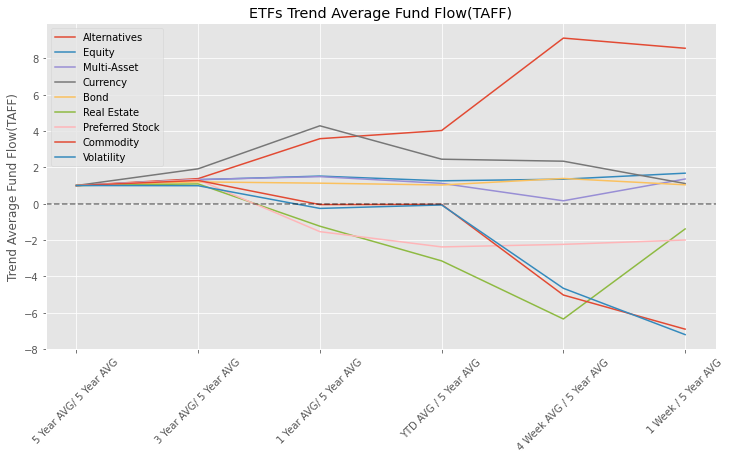

In [21]:
fig,ax = plt.subplots(figsize=(12,6))
ax.set_title('ETFs Trend Average Fund Flow(TAFF)')
for i in range(fund_flow_categories_performance_df.shape[0]):
    index_col = fund_flow_categories_performance_df.index[i]
    ax.plot(fund_flow_categories_performance_df.columns,fund_flow_categories_performance_df.loc[str(index_col)],label=str(index_col))
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel('Trend Average Fund Flow(TAFF)')
plt.axhline(0,linestyle="--",color='black',alpha=0.5)
ax.legend()
plt.show()

- [1.] The massive jump in the Alternatives Fund, Probably due to higlhy volatility market. The higly voaltility market will benefit the heged fund strategy product.
- [2.] When you look at YTD performance, you can also see that Equity, Commodity, Volatility fund out of invester's favor.

# Fund Return and Risk DataFrame
    - best performance fund
    - best in class
    - median in class

In [22]:
df_fund_performance

,Symbol,ETF Name,1 Week,1 Month,YTD,1 Year,3 Year,5 Year,Returns Rating,Asset Class New
0,SPY,SPDR S&P 500 ETF Trust,-0.15,-5.96,-22.17,-18.01,28.68,55.67,B,Equity
1,IVV,iShares Core S&P 500 ETF,-0.15,-5.94,-22.17,-18.02,29.00,56.41,B,Equity
2,VOO,Vanguard S&P 500 ETF,-0.12,-5.94,-22.16,-18.01,28.83,56.09,B,Equity
3,VTI,Vanguard Total Stock Market ETF,-0.26,-6.10,-23.23,-20.56,26.79,51.48,B-,Equity
4,QQQ,Invesco QQQ Trust,0.11,-7.54,-32.02,-27.79,43.09,88.02,A,Equity
...,...,...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Equity
2976,OSEA,Harbor International Compounders ETF,0.23,-6.35,NaN,NaN,NaN,NaN,NaN,Equity
2977,BWEB,Bitwise Web3 ETF,0.78,-7.25,NaN,NaN,NaN,NaN,NaN,Equity
2978,TSME,Thrivent Small-Mid Cap ESG ETF,-1.31,-3.55,NaN,NaN,NaN,NaN,NaN,Equity


In [23]:
def Top_and_Bottom_Performance(df_fund_performance):

    Top_15_fund_performance = df_fund_performance.sort_values(by='YTD',ascending=False).head(10).reset_index(drop=True)
    Bottom_15_fund_performance = df_fund_performance.sort_values(by='YTD',ascending=True).head(10).reset_index(drop=True)

    Top_15_fund_performance =  Top_15_fund_performance[['Symbol','ETF Name','Asset Class New','1 Week','1 Month','YTD','1 Year','5 Year']].reset_index(drop=True)
    Bottom_15_fund_performance = Bottom_15_fund_performance[['Symbol','ETF Name','Asset Class New','1 Week','1 Month','YTD','1 Year','5 Year']].reset_index(drop=True)

    Top_10_Key = pd.DataFrame(['Top 15 YTD Performance ETF',' ',' ',' ', ' ' ,' ',' ',' '],index= Top_15_fund_performance.columns).T
    Buttom_10_Key = pd.DataFrame(['Bottom 15 YTD Performance ETF',' ',' ',' ', ' ' ,' ',' ',' '],index= Top_15_fund_performance.columns).T

    Top_15_fund_performance = pd.concat([Top_10_Key, Top_15_fund_performance],axis=0)
    Bottom_15_fund_performance = pd.concat([Buttom_10_Key,Bottom_15_fund_performance],axis=0)
    df_top_and_bottom_performance_15 = pd.concat([ Top_15_fund_performance,Bottom_15_fund_performance],axis=0).reset_index(drop=True)
    
    return df_top_and_bottom_performance_15

Top_and_Bottom_Performance(df_fund_performance).to_excel(r'/Users/chen-lichiang/Desktop/ETFs Data Analysis/testing.xlsx')

In [24]:
fund_categories_performance = df_fund_performance.groupby('Asset Class New')['YTD'].agg(['max','min','median','mean'])
fund_categories_performance.columns = ['Best in Category','Worst in Category','Median in Category','Average in Category']
fund_categories_performance[['Best in Category','Worst in Category','Median in Category','Average in Category']] = fund_categories_performance[['Best in Category','Worst in Category','Median in Category','Average in Category']].round(decimals=2)
fund_categories_performance.sort_values(by='Average in Category',ascending=False)

,Best in Category,Worst in Category,Median in Category,Average in Category
Asset Class New,,,,
Commodity,161.82,-90.31,5.30,3.35
Alternatives,116.72,-43.08,-3.10,2.44
Volatility,16.98,-20.00,-10.77,-4.77
Bond,206.28,-75.64,-13.77,-11.87
Currency,69.15,-60.95,-13.81,-11.93
Multi-Asset,91.55,-67.41,-18.45,-17.45
Equity,226.84,-90.52,-22.43,-20.94
Preferred Stock,-11.74,-45.96,-20.81,-21.41
Real Estate,132.02,-72.78,-30.95,-24.93


In [25]:
df_fund_volatility

,Symbol,ETF Name,Standard Deviation,P/E Ratio,Beta,5-Day Volatility,20-Day Volatility,50-Day Volatility,200-Day Volatility,Asset Class New
0,SPY,SPDR S&P 500 ETF Trust,32.13,21.70,0.99,188.36,27.89,24.63,24.38,Equity
1,IVV,iShares Core S&P 500 ETF,32.30,33.23,0.99,188.29,27.80,24.64,24.38,Equity
2,VOO,Vanguard S&P 500 ETF,29.54,24.30,0.99,187.78,27.70,24.62,24.39,Equity
3,VTI,Vanguard Total Stock Market ETF,17.79,23.40,1.03,195.47,28.17,24.85,24.90,Equity
4,QQQ,Invesco QQQ Trust,40.98,30.43,1.03,260.19,31.19,28.88,30.28,Equity
...,...,...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Equity
2976,OSEA,Harbor International Compounders ETF,NaN,NaN,NaN,25.91,26.29,NaN,NaN,Equity
2977,BWEB,Bitwise Web3 ETF,NaN,NaN,NaN,54.45,NaN,NaN,NaN,Equity
2978,TSME,Thrivent Small-Mid Cap ESG ETF,NaN,NaN,NaN,31.26,NaN,NaN,NaN,Equity


In [26]:
fund_performance_and_volatility = pd.merge(df_fund_performance,df_fund_volatility)
fund_performance_and_volatility = fund_performance_and_volatility[['Symbol','ETF Name','Asset Class New','YTD','200-Day Volatility','P/E Ratio','Beta']]
fund_performance_and_volatility 

,Symbol,ETF Name,Asset Class New,YTD,200-Day Volatility,P/E Ratio,Beta
0,SPY,SPDR S&P 500 ETF Trust,Equity,-22.17,24.38,21.70,0.99
1,IVV,iShares Core S&P 500 ETF,Equity,-22.17,24.38,33.23,0.99
2,VOO,Vanguard S&P 500 ETF,Equity,-22.16,24.39,24.30,0.99
3,VTI,Vanguard Total Stock Market ETF,Equity,-23.23,24.90,23.40,1.03
4,QQQ,Invesco QQQ Trust,Equity,-32.02,30.28,30.43,1.03
...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,Equity,NaN,NaN,NaN,NaN
2976,OSEA,Harbor International Compounders ETF,Equity,NaN,NaN,NaN,NaN
2977,BWEB,Bitwise Web3 ETF,Equity,NaN,NaN,NaN,NaN
2978,TSME,Thrivent Small-Mid Cap ESG ETF,Equity,NaN,NaN,NaN,NaN


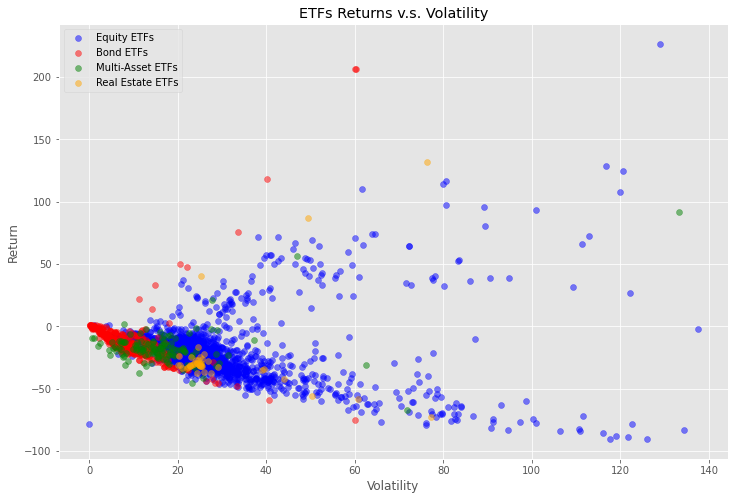

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_title('ETFs Returns v.s. Volatility')
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Equity']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Equity']['YTD'],color='blue',label='Equity ETFs',alpha=0.5)
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Bond']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Bond']['YTD'],color='red',label='Bond ETFs',alpha=0.5)
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Multi-Asset']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Multi-Asset']['YTD'],color='green',label='Multi-Asset ETFs',alpha=0.5)
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Real Estate']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Real Estate']['YTD'],color='orange',label='Real Estate ETFs',alpha=0.5)
ax.set_xlabel('Volatility')
ax.set_ylabel('Return')
ax.legend()

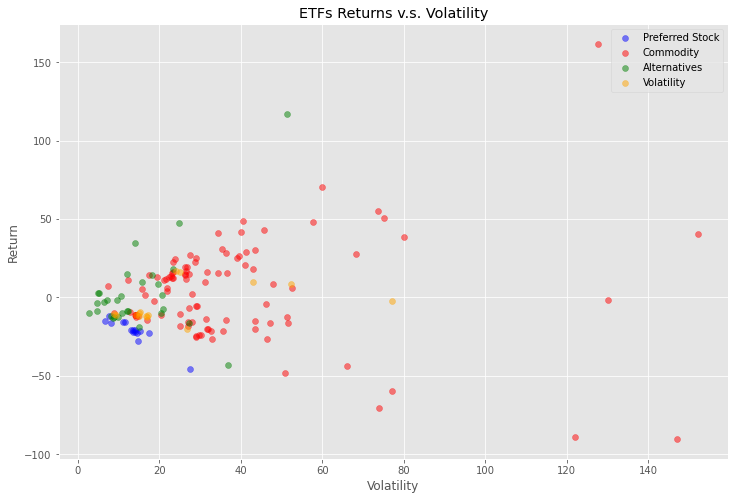

In [28]:
fig,ax = plt.subplots(figsize=(12,8))


ax.set_title('ETFs Returns v.s. Volatility')
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Preferred Stock']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Preferred Stock']['YTD'],color='blue',label='Preferred Stock',alpha=0.5)
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Commodity']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Commodity']['YTD'],color='red',label='Commodity',alpha=0.5)
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Alternatives']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Alternatives']['YTD'],color='green',label='Alternatives',alpha=0.5)
ax.scatter(fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Volatility']['200-Day Volatility'], fund_performance_and_volatility[fund_performance_and_volatility['Asset Class New']=='Volatility']['YTD'],color='orange',label='Volatility',alpha=0.5)

ax.set_xlabel('Volatility')
ax.set_ylabel('Return')
ax.legend()

# Fund ESG DataFrame

In [29]:
df_esg_performance

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%)
0,SPY,SPDR S&P 500 ETF Trust,8.94,Equity,67.70,81.84,6.95,6.95,5.73
1,IVV,iShares Core S&P 500 ETF,8.94,Equity,67.44,81.80,6.95,6.95,5.74
2,VOO,Vanguard S&P 500 ETF,8.94,Equity,66.19,81.58,6.92,6.92,5.72
3,VTI,Vanguard Total Stock Market ETF,8.49,Equity,36.15,71.53,6.38,6.38,6.07
4,QQQ,Invesco QQQ Trust,8.67,Equity,46.30,75.39,2.18,2.18,7.59
...,...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,NaN,Equity,NaN,NaN,NaN,NaN,NaN
2976,OSEA,Harbor International Compounders ETF,NaN,Equity,NaN,NaN,NaN,NaN,NaN
2977,BWEB,Bitwise Web3 ETF,NaN,Equity,NaN,NaN,NaN,NaN,NaN
2978,TSME,Thrivent Small-Mid Cap ESG ETF,NaN,Equity,NaN,NaN,NaN,NaN,NaN


In [30]:
df_esg_performance.sort_values(by='ESG Score',ascending=False).reset_index(drop=True)

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%)
0,VHT,Vanguard Health Care ETF,10.0,Equity,100.0,100.0,0.03,0.03,13.86
1,HEWC,iShares Currency Hedged MSCI Canada ETF,10.0,Equity,100.0,100.0,7.42,7.42,2.40
2,EWP,iShares MSCI Spain ETF,10.0,Equity,100.0,100.0,25.21,25.21,4.85
3,OUSA,ALPS O'Shares U.S. Quality Dividend ETF,10.0,Equity,100.0,100.0,8.77,8.77,6.57
4,BBCA,JPMorgan BetaBuilders Canada ETF,10.0,Equity,100.0,100.0,7.92,7.92,2.25
...,...,...,...,...,...,...,...,...,...
2975,EVSTCNX,Eaton Vance Stock NextShares,NaN,Equity,NaN,NaN,NaN,NaN,NaN
2976,OSEA,Harbor International Compounders ETF,NaN,Equity,NaN,NaN,NaN,NaN,NaN
2977,BWEB,Bitwise Web3 ETF,NaN,Equity,NaN,NaN,NaN,NaN,NaN
2978,TSME,Thrivent Small-Mid Cap ESG ETF,NaN,Equity,NaN,NaN,NaN,NaN,NaN


In [31]:
def Rank_ESG_Score(Score):

    Score = float(Score)
    
    if Score >= 7.5:
        return 1
    if Score >= 5 and Score < 7.5:
        return 2
    if Score >= 2.5 and Score < 5:
        return 3
    if Score >= 0 and Score < 2.5:
        return 4

df_esg_performance = df_esg_performance.sort_values(by='ESG Score',ascending=False).reset_index(drop=True)
df_esg_performance_with_performance = pd.merge(df_esg_performance,df_fund_performance).dropna()
df_esg_performance_with_performance['ESG Rank'] = df_esg_performance_with_performance.apply(lambda x: Rank_ESG_Score(x['ESG Score']),axis=1)
df_esg_performance_with_performance

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),1 Week,1 Month,YTD,1 Year,3 Year,5 Year,Returns Rating,ESG Rank
0,VHT,Vanguard Health Care ETF,10.00,Equity,100.00,100.00,0.03,0.03,13.86,-1.06,-2.84,-13.98,-9.05,38.38,56.96,B-,1
1,HEWC,iShares Currency Hedged MSCI Canada ETF,10.00,Equity,100.00,100.00,7.42,7.42,2.40,-0.06,-4.40,-10.42,-9.70,24.84,34.40,B+,1
2,EWP,iShares MSCI Spain ETF,10.00,Equity,100.00,100.00,25.21,25.21,4.85,2.69,-7.78,-20.38,-24.70,-21.12,-26.98,B-,1
3,OUSA,ALPS O'Shares U.S. Quality Dividend ETF,10.00,Equity,100.00,100.00,8.77,8.77,6.57,-0.63,-5.05,-18.01,-11.90,15.40,37.92,C+,1
6,EUFN,iShares MSCI Europe Financials ETF,10.00,Equity,100.00,100.00,0.00,0.00,0.82,2.32,-8.08,-24.51,-26.18,-12.39,-23.11,A-,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,KBWY,Invesco KBW Premium Yield Equity REIT ETF,1.95,Real Estate,1.15,1.49,3.88,3.88,5.63,0.37,-11.84,-22.28,-17.67,-22.52,-27.89,A,4
2211,CHII,Global X MSCI China Industrials ETF,1.75,Equity,9.02,1.15,2.81,2.81,15.47,0.33,-7.94,-28.63,-28.77,-2.73,-18.30,A+,4
2212,CHIM,Global X MSCI China Materials ETF,1.42,Equity,8.91,0.74,0.00,0.00,1.93,-1.31,-11.40,-32.12,-39.86,18.28,-12.88,B+,4
2214,ASHS,Xtrackers Harvest CSI 500 China A-Shares Small...,1.27,Equity,1.26,0.53,2.85,2.85,4.39,0.39,-3.31,-27.83,-26.50,18.04,-15.33,C,4


In [32]:
df_esg_performance_with_performance.groupby('ESG Rank')[['1 Week','1 Month','YTD','1 Year','3 Year','5 Year']].agg('mean').round(decimals=2)

,1 Week,1 Month,YTD,1 Year,3 Year,5 Year
ESG Rank,,,,,,
1,-0.29,-5.89,-19.63,-18.07,12.77,25.88
2,-0.88,-5.46,-18.06,-19.68,1.67,5.73
3,-0.53,-5.77,-17.87,-20.03,2.24,-1.39
4,-0.57,-8.41,-20.80,-22.61,5.17,-0.87


In [33]:
df_esg_performance = df_esg_performance.sort_values(by='ESG Score',ascending=False).reset_index(drop=True)
df_esg_performance_with_volatility = pd.merge(df_esg_performance,df_fund_volatility).dropna()
df_esg_performance_with_volatility['ESG Rank'] = df_esg_performance_with_volatility.apply(lambda x: Rank_ESG_Score(x['ESG Score']),axis=1)
df_esg_performance_with_volatility.head(10)

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),Standard Deviation,P/E Ratio,Beta,5-Day Volatility,20-Day Volatility,50-Day Volatility,200-Day Volatility,ESG Rank
0,VHT,Vanguard Health Care ETF,10.0,Equity,100.0,100.0,0.03,0.03,13.86,10.24,27.10,0.81,106.66,22.41,20.79,20.62,1
1,FHLC,Fidelity MSCI Health Care Index ETF,10.0,Equity,100.0,100.0,0.03,0.03,13.84,2.63,26.47,0.80,107.29,22.58,20.96,20.84,1
2,DURA,VanEck Durable High Dividend ETF,10.0,Equity,100.0,100.0,19.01,19.01,5.97,1.05,20.11,0.84,77.34,22.39,19.26,17.53,1
3,AQWA,Global X Clean Water ETF,10.0,Equity,0.0,100.0,0.00,0.00,27.20,1.42,34.73,-0.93,63.27,33.19,25.82,24.70,1
4,EFNL,iShares MSCI Finland ETF,10.0,Equity,100.0,100.0,3.09,3.09,9.96,4.57,23.34,0.97,209.35,35.54,28.91,28.33,1
5,TPYP,Tortoise North American Pipeline Fund,10.0,Equity,100.0,100.0,6.84,6.84,0.12,1.85,18.96,1.27,59.69,35.68,27.52,27.01,1
6,DIVO,Amplify CWP Enhanced Dividend Income ETF,10.0,Multi-Asset,100.0,100.0,5.97,5.97,2.76,1.20,23.46,0.81,21.05,20.71,16.81,16.36,1
7,IXN,iShares Global Tech ETF,10.0,Equity,100.0,100.0,0.15,0.15,7.66,6.41,38.52,1.03,259.08,33.21,29.48,30.00,1
9,SOXX,iShares Semiconductor ETF,10.0,Equity,100.0,100.0,0.00,0.00,6.29,65.98,32.73,1.17,172.48,42.06,38.82,39.87,1
10,PIO,Invesco Global Water ETF,10.0,Equity,0.0,100.0,0.00,0.00,19.55,4.18,25.80,0.88,184.76,31.63,26.11,25.31,1


In [34]:
df_esg_performance_with_volatility.groupby('ESG Rank')[['P/E Ratio','Standard Deviation','5-Day Volatility','20-Day Volatility','50-Day Volatility','200-Day Volatility']].agg('mean').round(decimals=2)

,P/E Ratio,Standard Deviation,5-Day Volatility,20-Day Volatility,50-Day Volatility,200-Day Volatility
ESG Rank,,,,,,
1,24.47,5.17,141.25,29.23,24.92,24.73
2,24.32,6.11,157.45,32.43,28.15,28.78
3,19.15,3.74,131.00,31.03,26.24,26.53
4,21.85,2.89,81.68,31.03,26.22,25.97


In [35]:
df_esg_performance = df_esg_performance.sort_values(by='ESG Score',ascending=False).reset_index(drop=True)
df_esg_performance_with_aum = pd.merge(df_esg_performance,df_overview_fund).dropna()
df_esg_performance_with_aum['ESG Rank'] = df_esg_performance_with_aum.apply(lambda x: Rank_ESG_Score(x['ESG Score']),axis=1)
df_esg_performance_with_aum.head(10)

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),Total Assets ($MM),YTD Price Change,Avg. Daily Share Volume (3mo),Previous Closing Price,ETF Database Pro,ETF Category AUM,Categories Percentage(%),Weighted Performance,ESG Rank
0,VHT,Vanguard Health Care ETF,10.0,Equity,100.0,100.0,0.03,0.03,13.86,15821,-13.98,210158,$226.91,A+,4614016,0.34,-0.05,1
1,FLZA,Franklin FTSE South Africa ETF,10.0,Equity,100.0,100.0,2.94,2.94,3.29,3,-18.87,844,$19.69,C+,4614016,0.00,-0.00,1
2,VIGI,Vanguard International Dividend Appreciation ETF,10.0,Equity,100.0,100.0,5.93,5.93,13.79,3376,-26.20,277747,$62.15,A,4614016,0.07,-0.02,1
3,EWC,iShares MSCI Canada ETF,10.0,Equity,100.0,100.0,7.58,7.58,2.45,3387,-18.31,3029697,$31.17,B+,4614016,0.07,-0.01,1
4,SMH,VanEck Semiconductor ETF,10.0,Equity,100.0,100.0,0.00,0.00,6.69,5936,-41.66,4237188,$180.14,A-,4614016,0.13,-0.05,1
5,ITA,iShares U.S. Aerospace & Defense ETF,10.0,Equity,100.0,100.0,75.72,75.72,0.30,3544,-2.27,362897,$99.64,B+,4614016,0.08,-0.00,1
6,IXJ,iShares Global Healthcare ETF,10.0,Equity,100.0,100.0,0.80,0.80,16.06,3592,-14.54,179468,$76.70,A,4614016,0.08,-0.01,1
7,RAFE,PIMCO RAFI ESG U.S. ETF,10.0,Multi-Asset,100.0,100.0,0.29,0.29,5.48,26,-19.68,3955,$26.18,B-,33071,0.08,-0.02,1
8,FLTR,VanEck IG Floating Rate ETF,10.0,Bond,100.0,100.0,3.56,3.56,0.90,1129,-0.67,403433,$24.81,B-,1185455,0.10,-0.00,1
9,HEWC,iShares Currency Hedged MSCI Canada ETF,10.0,Equity,100.0,100.0,7.42,7.42,2.40,16,-10.42,10194,$29.48,B+,4614016,0.00,-0.00,1


In [36]:
df_esg_performance_with_aum.groupby('ESG Rank')[['Symbol']].agg('count').round(decimals=2)

,Symbol
ESG Rank,
1,1174
2,859
3,170
4,15


In [37]:
df_esg_performance_with_aum.groupby('ESG Rank')[['Total Assets ($MM)']].agg('sum').round(decimals=2)

,Total Assets ($MM)
ESG Rank,
1,3973995
2,1624728
3,79970
4,1470


In [38]:
df_esg_performance = df_esg_performance.sort_values(by='ESG Score',ascending=False).reset_index(drop=True)
df_esg_performance_with_flow = pd.merge(df_esg_performance,df_fund_flow).dropna()
df_esg_performance_with_flow['ESG Rank'] = df_esg_performance_with_flow.apply(lambda x: Rank_ESG_Score(x['ESG Score']),axis=1)
df_esg_performance_with_flow.head(10)

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),1 Week ($MM),4 Week ($MM),YTD ($MM),1 Year ($MM),3 Year ($MM),5 Year ($MM),ESG Rank
0,VHT,Vanguard Health Care ETF,10.0,Equity,100.0,100.0,0.03,0.03,13.86,68.78,136.94,705.29,1120.81,4054.01,4901.68,1
1,SUSB,iShares ESG Aware 1-5 Year USD Corporate Bond ETF,10.0,Bond,100.0,100.0,4.88,4.88,4.14,-24.48,4.90,-48.16,-22.34,889.93,1010.51,1
2,BKUI,BNY Mellon Ultra Short Income ETF,10.0,Bond,100.0,100.0,0.92,0.92,1.88,0.00,2.44,2.44,2.45,4.95,4.95,1
3,MBOX,Freedom Day Dividend ETF,10.0,Equity,100.0,100.0,7.78,7.78,4.72,0.00,3.07,15.84,19.81,45.42,45.42,1
4,DIA,SPDR Dow Jones Industrial Average ETF Trust,10.0,Equity,100.0,100.0,7.30,7.30,5.85,-143.17,-54.66,1273.98,1003.82,1891.22,1452.02,1
5,DJIA,Global X Dow 30 Covered Call ETF,10.0,Equity,100.0,100.0,7.29,7.29,5.85,0.65,6.40,49.25,49.25,49.25,49.25,1
6,PIO,Invesco Global Water ETF,10.0,Equity,0.0,100.0,0.00,0.00,19.55,1.44,2.86,-1.10,26.23,64.30,35.13,1
7,SOXX,iShares Semiconductor ETF,10.0,Equity,100.0,100.0,0.00,0.00,6.29,-90.46,-25.78,-405.01,620.79,3289.22,3541.30,1
8,IXN,iShares Global Tech ETF,10.0,Equity,100.0,100.0,0.15,0.15,7.66,-4.28,-75.53,-815.19,-1372.87,-855.73,-23.24,1
9,FHLC,Fidelity MSCI Health Care Index ETF,10.0,Equity,100.0,100.0,0.03,0.03,13.84,5.91,49.86,274.82,258.71,891.16,1368.88,1


In [39]:
df_edg_return_and_volatility = pd.merge(df_esg_performance_with_performance,df_esg_performance_with_volatility)
df_edg_return_and_volatility['ESG Rank'] = df_edg_return_and_volatility.apply(lambda x: Rank_ESG_Score(x['ESG Score']),axis=1)
df_edg_return_and_volatility.columns

Index(['Symbol', 'ETF Name', 'ESG Score', 'Asset Class New',
       'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)',
       'Carbon Intensity (Tons of CO2e / $M Sales)',
       'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)',
       '1 Week', '1 Month', 'YTD', '1 Year', '3 Year', '5 Year',
       'Returns Rating', 'ESG Rank', 'Standard Deviation', 'P/E Ratio', 'Beta',
       '5-Day Volatility', '20-Day Volatility', '50-Day Volatility',
       '200-Day Volatility'],
      dtype='object')

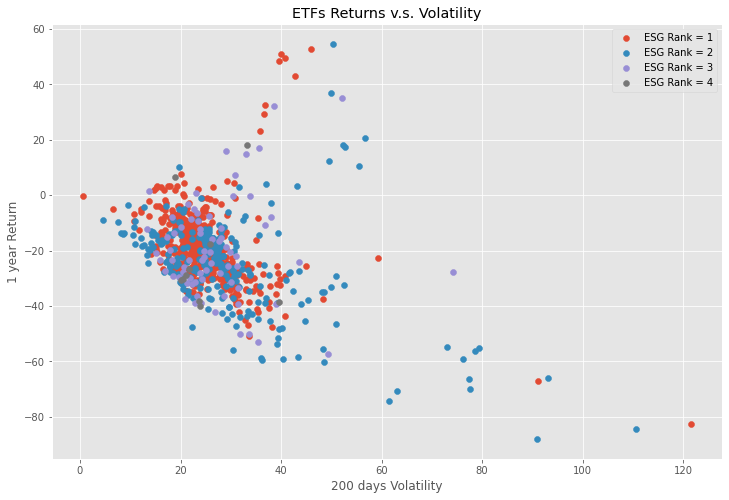

In [40]:
fig,ax = plt.subplots(figsize=(12,8))


ax.set_title('ETFs Returns v.s. Volatility')
ax.scatter(df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==1]['200-Day Volatility'],df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==1]['1 Year'],label='ESG Rank = 1')
ax.scatter(df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==2]['200-Day Volatility'],df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==2]['1 Year'],label='ESG Rank = 2')
ax.scatter(df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==3]['200-Day Volatility'],df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==3]['1 Year'],label='ESG Rank = 3')
ax.scatter(df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==4]['200-Day Volatility'],df_edg_return_and_volatility[df_edg_return_and_volatility['ESG Rank']==4]['1 Year'],label='ESG Rank = 4')

ax.set_xlabel('200 days Volatility')
ax.set_ylabel('1 year Return')
ax.legend()

In [41]:
df_esg_performance_with_flow.groupby('ESG Rank')[['1 Week ($MM)','4 Week ($MM)','YTD ($MM)','1 Year ($MM)','3 Year ($MM)','5 Year ($MM)']].agg('sum').round(decimals=2)

,1 Week ($MM),4 Week ($MM),YTD ($MM),1 Year ($MM),3 Year ($MM),5 Year ($MM)
ESG Rank,,,,,,
1,11253.02,38166.32,339792.55,492260.42,1218245.05,1557912.91
2,3224.48,14085.56,135065.33,191880.84,645634.05,862467.12
3,436.63,-912.92,749.56,4428.23,30222.79,41869.73
4,1.79,-23.79,-237.20,116.22,1011.76,1287.95


In [42]:
df_esg_performance_with_flow_percentage = df_esg_performance_with_flow.groupby('ESG Rank')[['1 Week ($MM)','4 Week ($MM)','YTD ($MM)','1 Year ($MM)','3 Year ($MM)','5 Year ($MM)']].agg('sum').round(decimals=2)
df_esg_performance_with_flow_percentage['4 Week ($MM)'] = df_esg_performance_with_flow_percentage['4 Week ($MM)'] / 4
df_esg_performance_with_flow_percentage['YTD ($MM)'] = df_esg_performance_with_flow_percentage['YTD ($MM)'] / (4*dt.datetime.now().month)
df_esg_performance_with_flow_percentage['1 Year ($MM)'] = df_esg_performance_with_flow_percentage['1 Year ($MM)'] / (4*12)
df_esg_performance_with_flow_percentage['3 Year ($MM)'] = df_esg_performance_with_flow_percentage['3 Year ($MM)'] / (4*12*3)
df_esg_performance_with_flow_percentage['5 Year ($MM)'] = df_esg_performance_with_flow_percentage['5 Year ($MM)'] / (4*12*5)

df_esg_performance_with_flow_percentage['1 Week ($MM)'] /= df_esg_performance_with_flow_percentage['5 Year ($MM)']
df_esg_performance_with_flow_percentage['4 Week ($MM)'] /= df_esg_performance_with_flow_percentage['5 Year ($MM)']
df_esg_performance_with_flow_percentage['YTD ($MM)'] /= df_esg_performance_with_flow_percentage['5 Year ($MM)']
df_esg_performance_with_flow_percentage['1 Year ($MM)'] /= df_esg_performance_with_flow_percentage['5 Year ($MM)']
df_esg_performance_with_flow_percentage['3 Year ($MM)'] /= df_esg_performance_with_flow_percentage['5 Year ($MM)']
df_esg_performance_with_flow_percentage['5 Year ($MM)'] /= df_esg_performance_with_flow_percentage['5 Year ($MM)']

df_esg_performance_with_flow_percentage.columns  = ['1 Week / 5 Year AVG', '4 Week AVG / 5 Year AVG','YTD AVG / 5 Year AVG','1 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','5 Year AVG/ 5 Year AVG']
df_esg_performance_with_flow_percentage[['1 Week / 5 Year AVG', '4 Week AVG / 5 Year AVG','YTD AVG / 5 Year AVG','1 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','5 Year AVG/ 5 Year AVG']] = df_esg_performance_with_flow_percentage[['1 Week / 5 Year AVG', '4 Week AVG / 5 Year AVG','YTD AVG / 5 Year AVG','1 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','5 Year AVG/ 5 Year AVG']].astype(float).round(decimals=2)
df_esg_performance_with_flow_percentage.sort_values(by='1 Week / 5 Year AVG',ascending=False)

df_esg_performance_with_flow_percentage[['5 Year AVG/ 5 Year AVG','3 Year AVG/ 5 Year AVG','1 Year AVG/ 5 Year AVG','YTD AVG / 5 Year AVG', '4 Week AVG / 5 Year AVG','1 Week / 5 Year AVG']]

,5 Year AVG/ 5 Year AVG,3 Year AVG/ 5 Year AVG,1 Year AVG/ 5 Year AVG,YTD AVG / 5 Year AVG,4 Week AVG / 5 Year AVG,1 Week / 5 Year AVG
ESG Rank,,,,,,
1,1.0,1.30,1.58,1.31,1.47,1.73
2,1.0,1.25,1.11,0.94,0.98,0.90
3,1.0,1.20,0.53,0.11,-1.31,2.50
4,1.0,1.31,0.45,-1.11,-1.11,0.33


In [43]:
df_esg_performance_with_flow

,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),1 Week ($MM),4 Week ($MM),YTD ($MM),1 Year ($MM),3 Year ($MM),5 Year ($MM),ESG Rank
0,VHT,Vanguard Health Care ETF,10.00,Equity,100.00,100.00,0.03,0.03,13.86,68.78,136.94,705.29,1120.81,4054.01,4901.68,1
1,SUSB,iShares ESG Aware 1-5 Year USD Corporate Bond ETF,10.00,Bond,100.00,100.00,4.88,4.88,4.14,-24.48,4.90,-48.16,-22.34,889.93,1010.51,1
2,BKUI,BNY Mellon Ultra Short Income ETF,10.00,Bond,100.00,100.00,0.92,0.92,1.88,0.00,2.44,2.44,2.45,4.95,4.95,1
3,MBOX,Freedom Day Dividend ETF,10.00,Equity,100.00,100.00,7.78,7.78,4.72,0.00,3.07,15.84,19.81,45.42,45.42,1
4,DIA,SPDR Dow Jones Industrial Average ETF Trust,10.00,Equity,100.00,100.00,7.30,7.30,5.85,-143.17,-54.66,1273.98,1003.82,1891.22,1452.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,KFVG,KraneShares CICC China 5G & Semiconductor Inde...,1.32,Equity,5.05,0.59,0.00,0.00,0.08,0.00,-0.74,-6.96,-6.97,30.64,30.64,4
2214,ASHS,Xtrackers Harvest CSI 500 China A-Shares Small...,1.27,Equity,1.26,0.53,2.85,2.85,4.39,0.00,0.00,2.03,2.03,-24.67,12.80,4
2215,CHIE,Global X MSCI China Energy ETF,1.25,Equity,1.85,0.51,3.52,3.52,1.15,0.00,1.56,0.36,4.21,6.69,6.91,4
2216,KSTR,KraneShares SSE Star Market 50 Index ETF,1.14,Equity,4.31,0.45,0.00,0.00,4.94,0.02,0.00,-24.20,-32.84,77.29,77.29,4


In [44]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
text_list = df_esg_performance_with_flow[df_esg_performance_with_flow['ESG Rank']==1]['ETF Name'].to_list()
text = ""
for txt in text_list:
        text = text + " " + txt 

cloud = WordCloud(background_color="white", max_words=200, mask=None, 
        stopwords=stopwords, min_font_size=6, width=800, height=400,colormap="inferno")
 
cloud.generate(text)
cloud.to_file("./Image/output ESG Rank 1.png")

In [45]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
text_list = df_esg_performance_with_flow[df_esg_performance_with_flow['ESG Rank']==2]['ETF Name'].to_list()
text = ""
for txt in text_list:
        text = text + " " + txt 

cloud = WordCloud(background_color="white", max_words=200, mask=None, 
        stopwords=stopwords, min_font_size=6, width=800, height=400,colormap="inferno")
 
cloud.generate(text)
cloud.to_file("./Image/output ESG Rank 2.png")

In [46]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
text_list = df_esg_performance_with_flow[df_esg_performance_with_flow['ESG Rank']==3]['ETF Name'].to_list()
text = ""
for txt in text_list:
        text = text + " " + txt 

cloud = WordCloud(background_color="white", max_words=200, mask=None, 
        stopwords=stopwords, min_font_size=6, width=800, height=400,colormap="inferno")
 
cloud.generate(text)
cloud.to_file("./Image/output ESG Rank 3.png")

In [47]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
text_list = df_esg_performance_with_flow[df_esg_performance_with_flow['ESG Rank']==4]['ETF Name'].to_list()
text = ""
for txt in text_list:
        text = text + " " + txt 

cloud = WordCloud(background_color="white", max_words=200, mask=None, 
        stopwords=stopwords, min_font_size=6, width=800, height=400,colormap="inferno")
 
cloud.generate(text)
cloud.to_file("./Image/output ESG Rank 4.png")